In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 7.3 MB/s 
     |████████████████████████████████| 18.0 MB 245 kB/s 
     |████████████████████████████████| 240 kB 52.0 MB/s 
     |████████████████████████████████| 198 kB 11.3 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 112 kB 39.5 MB/s 
     |████████████████████████████████| 1.6 MB 41.8 MB/s 
     |████████████████████████████████| 943 kB 57.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 49.1 MB/s 
     |████████████████████████████████| 112 kB 47.8 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=72b0353bc0

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [3]:
qc=QuantumCircuit(3,3) #q0=qubit1 and q1=qubit2 of the table
qc.h(0)
qc.y(0)
qc.x(1)
qc.z(1)
qc.y(1)
qc.cz(0,1)
qc.barrier()
qc.draw()

┌───┐┌───┐         ░ 
q_0: ┤ H ├┤ Y ├──────■──░─
     ├───┤├───┤┌───┐ │  ░ 
q_1: ┤ X ├┤ Z ├┤ Y ├─■──░─
     └───┘└───┘└───┘    ░ 
q_2: ───────────────────░─
                        ░ 
c: 3/═════════════════════

In [4]:
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.draw()

┌───┐┌───┐         ░            ░ 
q_0: ┤ H ├┤ Y ├──────■──░────────────░─
     ├───┤├───┤┌───┐ │  ░ ┌───┐      ░ 
q_1: ┤ X ├┤ Z ├┤ Y ├─■──░─┤ H ├──■───░─
     └───┘└───┘└───┘    ░ └───┘┌─┴─┐ ░ 
q_2: ───────────────────░──────┤ X ├─░─
                        ░      └───┘ ░ 
c: 3/══════════════════════════════════

In [5]:
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.barrier()
qc.draw()

┌───┐┌───┐         ░            ░      ┌───┐┌─┐ ░ 
q_0: ┤ H ├┤ Y ├──────■──░────────────░───■──┤ H ├┤M├─░─
     ├───┤├───┤┌───┐ │  ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░ 
q_1: ┤ X ├┤ Z ├┤ Y ├─■──░─┤ H ├──■───░─┤ X ├─┤M├──╫──░─
     └───┘└───┘└───┘    ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ 
q_2: ───────────────────░──────┤ X ├─░────────╫───╫──░─
                        ░      └───┘ ░        ║   ║  ░ 
c: 3/═════════════════════════════════════════╩═══╩════
                                              1   0

In [6]:
qc.cx(1,2)
qc.cz(0,2)
qc.barrier()
qc.measure(2,2)
qc.draw()

┌───┐┌───┐         ░            ░      ┌───┐┌─┐ ░          ░    
q_0: ┤ H ├┤ Y ├──────■──░────────────░───■──┤ H ├┤M├─░───────■──░────
     ├───┤├───┤┌───┐ │  ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░       │  ░    
q_1: ┤ X ├┤ Z ├┤ Y ├─■──░─┤ H ├──■───░─┤ X ├─┤M├──╫──░───■───┼──░────
     └───┘└───┘└───┘    ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ ┌─┴─┐ │  ░ ┌─┐
q_2: ───────────────────░──────┤ X ├─░────────╫───╫──░─┤ X ├─■──░─┤M├
                        ░      └───┘ ░        ║   ║  ░ └───┘    ░ └╥┘
c: 3/═════════════════════════════════════════╩═══╩════════════════╩═
                                              1   0                2

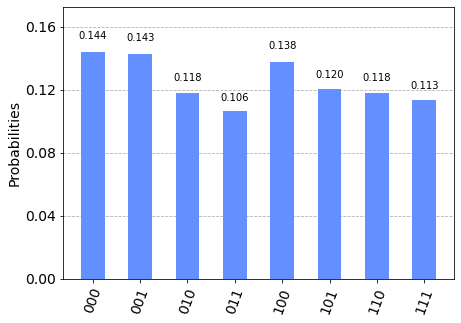

In [7]:
backend=Aer.get_backend('aer_simulator')
result=backend.run(qc).result()
count=result.get_counts(qc)
plot_histogram(count)